In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
Omovies=pd.read_csv('2movies.csv')

In [3]:
movies=Omovies.head(500)

In [4]:
movies.head(10)

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
5,5,One Flew Over the Cuckoo's Nest,[u' Drama'],"In 1963 Oregon, Randle Patrick ""Mac"" McMurphy ...","In 1963 Oregon, Randle Patrick McMurphy (Nicho..."
6,6,Gone with the Wind,"[u' Drama', u' Romance', u' War']",\nPart 1\n \n Part 1 Part 1 \n \n On the...,"The film opens in Tara, a cotton plantation ow..."
7,7,Citizen Kane,"[u' Drama', u' Mystery']",\n\n\n\nOrson Welles as Charles Foster Kane\n\...,"It's 1941, and newspaper tycoon Charles Foster..."
8,8,The Wizard of Oz,"[u' Adventure', u' Family', u' Fantasy', u' Mu...",The film starts in sepia-tinted Kansas in the ...,Dorothy Gale (Judy Garland) is an orphaned tee...
9,9,Titanic,"[u' Drama', u' Romance']","In 1996, treasure hunter Brock Lovett and his ...","In 1996, treasure hunter Brock Lovett and his ..."


In [5]:

movies.describe()

,rank
count,100.000000
mean,49.500000
std,29.011492
min,0.000000
25%,24.750000
50%,49.500000
75%,74.250000
max,99.000000


In [6]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       100 non-null    int64 
 1   title      100 non-null    object
 2   genre      100 non-null    object
 3   wiki_plot  100 non-null    object
 4   imdb_plot  90 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [7]:
movies.isnull().sum()

rank          0
title         0
genre         0
wiki_plot     0
imdb_plot    10
dtype: int64

In [8]:
movies.columns

Index(['rank', 'title', 'genre', 'wiki_plot', 'imdb_plot'], dtype='object')

In [9]:
#movies=movies[['id', 'title', 'overview', 'genre']]

In [10]:

movies

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


In [11]:
movies['plot'] = movies['wiki_plot'].astype(str) + "\n" + \
                 movies['imdb_plot'].astype(str)

C:\Users\Saw YTR\AppData\Local\Temp\ipykernel_2808\1743749165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['plot'] = movies['wiki_plot'].astype(str) + "\n" + \


In [12]:
movies['tags'] = movies['plot']+movies['genre']

C:\Users\Saw YTR\AppData\Local\Temp\ipykernel_2808\3564276152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['plot']+movies['genre']


In [13]:

movies

,rank,title,genre,wiki_plot,imdb_plot,plot,tags
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...","In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,It is early December 1941. American expatriate...
...,...,...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...,\n\n\n\nJim Stark is in police custody.\n\n \...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...,\n\n\n\nSocial network mapping all major chara...
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...,Advertising executive Roger O. Thornhill is mi...


In [14]:

new_data  = movies.drop(columns=['plot', 'genre'])

In [15]:
new_data

,rank,title,wiki_plot,imdb_plot,tags
0,0,The Godfather,"On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...
...,...,...,...,...,...
95,95,Rebel Without a Cause,\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...
96,96,Rear Window,\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...
97,97,The Third Man,\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...
98,98,North by Northwest,Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...


In [16]:
from nltk.stem.snowball import SnowballStemmer


stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    
    
    tokens = text
    word_tokenized = [token for tokens in nltk.sent_tokenize(tokens) for token in nltk.word_tokenize(tokens)]
    
    filtered_tokens = [token for token in word_tokenized if re.search('[a-zA-Z]', token)]
    
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [18]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies["plot"]])
print(tfidf_matrix.shape)

c:\Users\Saw YTR\anaconda3\envs\CS_Students\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Saw YTR\anaconda3\envs\CS_Students\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', '

(100, 564)


In [19]:

from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
movies["cluster"] = clusters
movies['cluster'].value_counts() 

c:\Users\Saw YTR\anaconda3\envs\CS_Students\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saw YTR\AppData\Local\Temp\ipykernel_2808\4191440689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["cluster"] = clusters


1    42
2    21
4    16
0    15
3     6
Name: cluster, dtype: int64

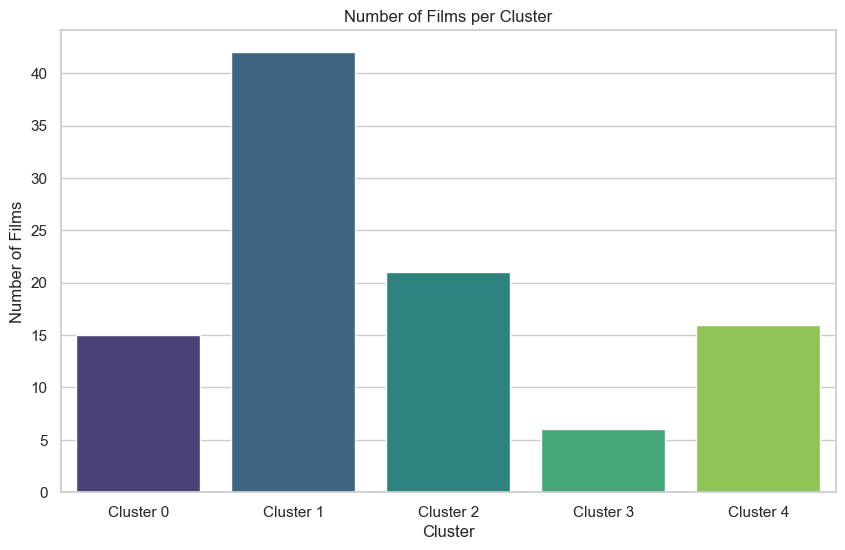

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


cluster_counts = movies['cluster'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


plt.xlabel('Cluster')
plt.ylabel('Number of Films')
plt.title('Number of Films per Cluster')


plt.xticks(ticks=range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index])

plt.show()

In [21]:
# Dispaying in a Dendogram

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [23]:

import matplotlib.pyplot as plt


%matplotlib inline


from scipy.cluster.hierarchy import dendrogram, linkage

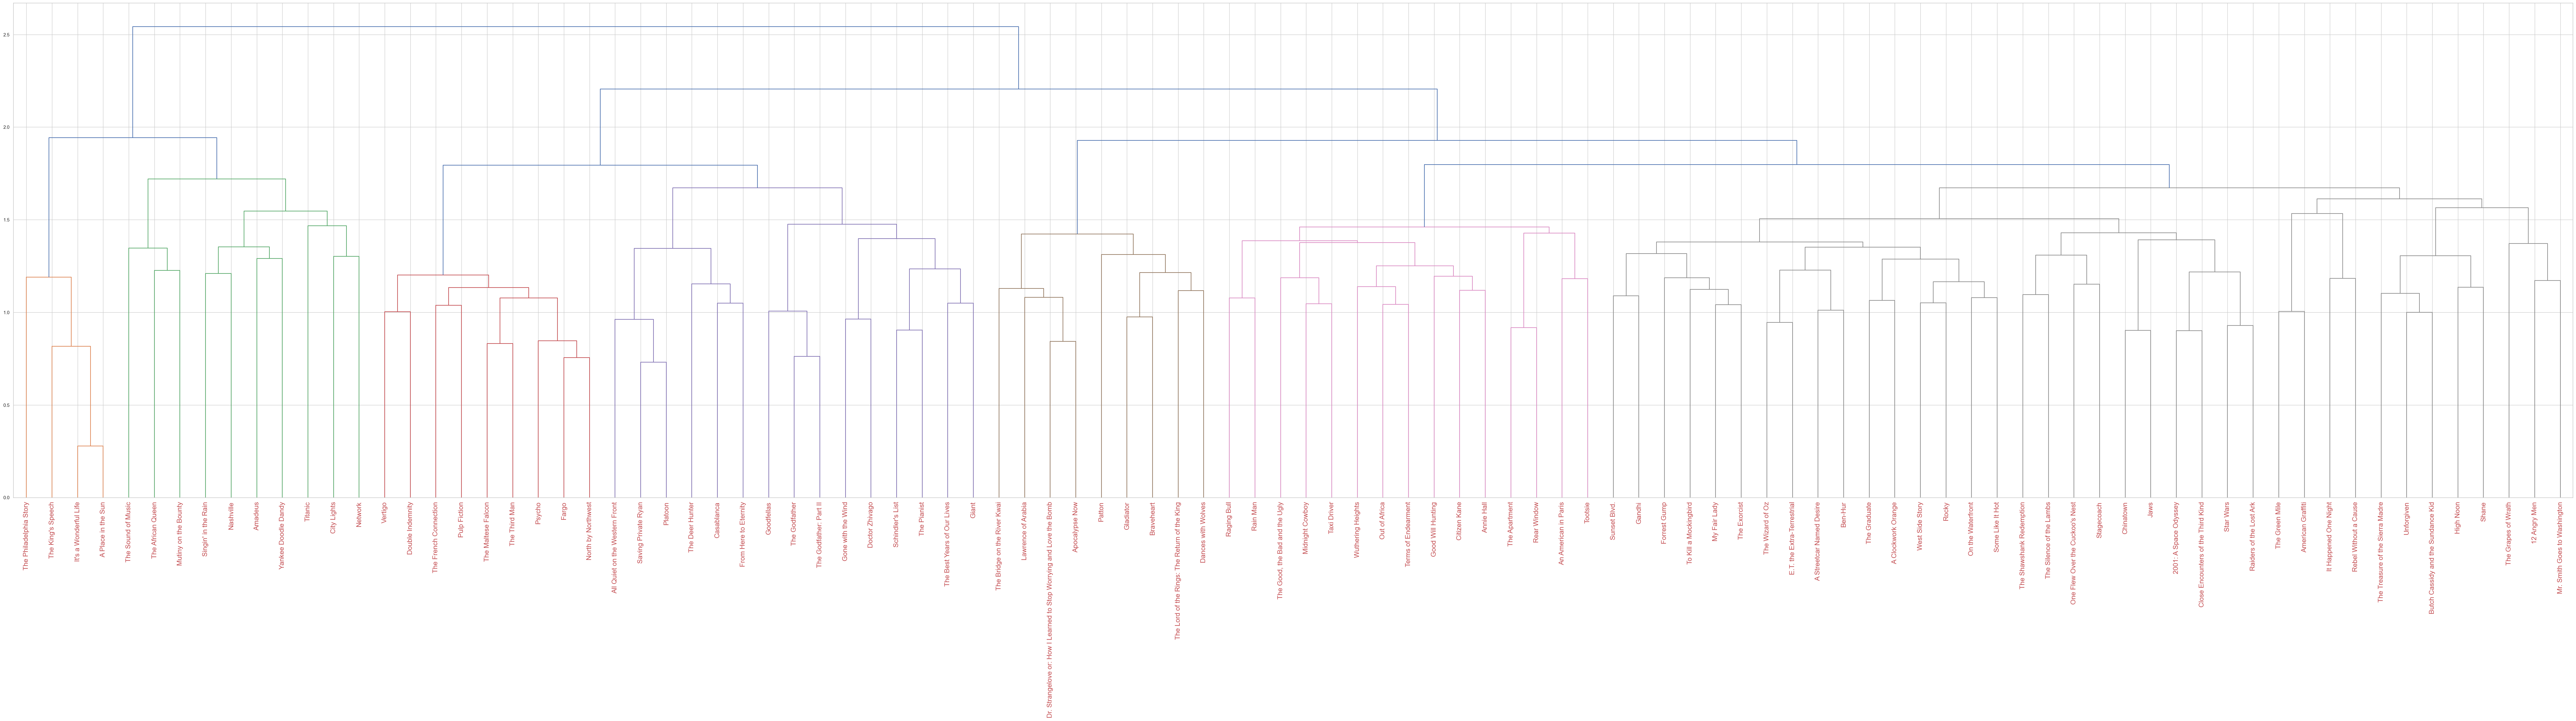

In [24]:
mergings = linkage(similarity_distance, method='complete')


dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)


fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)


plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:

cv=CountVectorizer(max_features=10000, stop_words='english')

In [39]:

vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [29]:
vector.shape

(100, 10000)

In [30]:

from sklearn.metrics.pairwise import cosine_similarity

In [31]:
similarity=cosine_similarity(vector)

In [32]:
similarity

array([[1.        , 0.03961543, 0.05602677, ..., 0.06259039, 0.06760542,
        0.05903373],
       [0.03961543, 1.        , 0.06515333, ..., 0.04200522, 0.04793525,
        0.02651929],
       [0.05602677, 0.06515333, 1.        , ..., 0.04289939, 0.04353924,
        0.04726005],
       ...,
       [0.06259039, 0.04200522, 0.04289939, ..., 1.        , 0.09749722,
        0.02445784],
       [0.06760542, 0.04793525, 0.04353924, ..., 0.09749722, 1.        ,
        0.04532566],
       [0.05903373, 0.02651929, 0.04726005, ..., 0.02445784, 0.04532566,
        1.        ]])

In [33]:
new_data[new_data['title']=="The Godfather"].index[0]

0

In [34]:

distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

Schindler's List
The Pianist
The Grapes of Wrath
All Quiet on the Western Front
Saving Private Ryan


In [35]:

def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [36]:

recommand("The Pianist")

The Pianist
Schindler's List
The Grapes of Wrath
Saving Private Ryan
All Quiet on the Western Front


In [37]:
import pickle

In [38]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
pickle.load(open('movies_list.pkl', 'rb'))

,rank,title,wiki_plot,imdb_plot,tags
0,0,The Godfather,"On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...
...,...,...,...,...,...
95,95,Rebel Without a Cause,\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...
96,96,Rear Window,\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...
97,97,The Third Man,\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...
98,98,North by Northwest,Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...
